In [1]:
%reset
import sys, platform, os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pdb
import healpy as hp
from astropy.io import fits
import time
import math
from scipy import interpolate
import pickle as pk
import treecorr
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
# import astropy.constant as c
sys.path.insert(0,'../')

cosmo_des = FlatLambdaCDM(H0=100, Om0=0.283705720011)
cosmo_pl = FlatLambdaCDM(H0=100, Om0=0.3158)


#see http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

%matplotlib inline







Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
mask = fits.open('/project/projectdirs/des/jderose/redmapper/buzzard/v1.9.2/des-y3a1/redmapper_v6.4.22/redmagic_3y3/buzzard_1.9.2+1_3y3_run_redmapper_v6.4.22_redmagic_highdens_0.5_vlim_zmask.fit')  



In [4]:
mask[1].header



XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   20 /Number of bytes per row                         
NAXIS2  =             23110486 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    4 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
NSIDE   =                 4096 /                                                
NEST    =                   

In [8]:
mask = hp.read_map('/project/projectdirs/des/jderose/redmapper/buzzard/v1.9.2/des-y3a1/redmapper_v6.4.22/redmagic_3y3/buzzard_1.9.2+1_3y3_run_redmapper_v6.4.22_redmagic_highdens_0.5_vlim_zmask.fit',partial=True)     



NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/healpy/fitsfunc.py:367: UserWarning: No INDXSCHM keyword in header file : assume EXPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


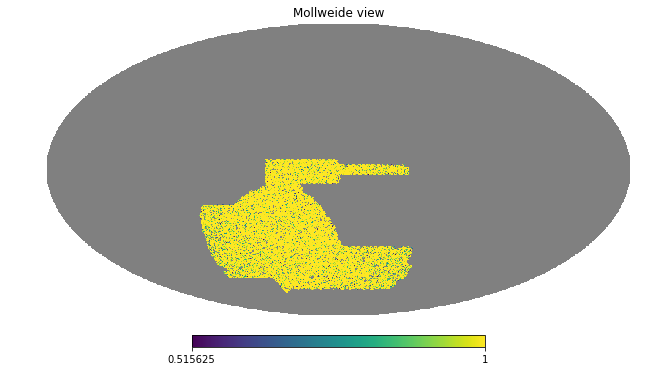

In [9]:
hp.mollview(mask)




In [2]:
load_dir = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/process_cats/'
load_filename_matter = 'matter_ra_dec_r_z_bin_jk_L3072N4096-LC129-1in700_njkradec_' + str(
    180) + '_njkz_' + str(1) + '_ds_' + str(2) + '.fits'

fm = fits.open(load_dir + load_filename_matter)


In [3]:
zmin = 0.45
zmax = 0.6

ra_all,dec_all,r_all,z_all = fm[1].data['RA'], fm[1].data['DEC'], fm[1].data['R'], fm[1].data['Z']

ind_sel = np.where((z_all > zmin) & (z_all < zmax))[0]
ra,dec,r,z = ra_all[ind_sel],dec_all[ind_sel],r_all[ind_sel],z_all[ind_sel]  


In [4]:
import nbodykit as nbk
from nbodykit.source.catalog import ArrayCatalog




In [5]:
def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi



In [6]:
theta, phi = eq2ang(ra,dec)



In [7]:
R = r
X = R * np.cos(phi) * np.cos(theta)
Y = R * np.sin(phi) * np.cos(theta)
Z = R * np.sin(theta)


In [8]:
xyz = np.vstack((X,Y,Z)).T


In [9]:
xyz.shape

(1834000, 3)

In [10]:
rand_ind = np.random.randint(0,len(X),100000)
xyz_rand = xyz[rand_ind,:]


In [35]:


fcat_m = ArrayCatalog(np.ones(len(rand_ind), dtype=[('Position', ('f4', 3))]))

fcat_m['Position'] = xyz_rand



In [36]:
np.max(R)


1578.1212

In [39]:
mesh = fcat_m.to_mesh(BoxSize=1580,Nmesh=512)



In [40]:
import matplotlib.pyplot as plt
plt.imshow(mesh.preview(axes=[0,1], Nmesh=32))


KeyboardInterrupt: 

In [41]:
from nbodykit.lab import *



In [47]:
r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.0001)



In [48]:
Pk = r.power


In [49]:

print(Pk.coords)


{'k': array([0.0026, 0.0076, 0.0126, 0.0176, 0.0226, 0.0276, 0.0326, 0.0376,
       0.0426, 0.0476, 0.0526, 0.0576, 0.0626, 0.0676, 0.0726, 0.0776,
       0.0826, 0.0876, 0.0926, 0.0976, 0.1026, 0.1076, 0.1126, 0.1176,
       0.1226, 0.1276, 0.1326, 0.1376, 0.1426, 0.1476, 0.1526, 0.1576,
       0.1626, 0.1676, 0.1726, 0.1776, 0.1826, 0.1876, 0.1926, 0.1976,
       0.2026, 0.2076, 0.2126, 0.2176, 0.2226, 0.2276, 0.2326, 0.2376,
       0.2426, 0.2476, 0.2526, 0.2576, 0.2626, 0.2676, 0.2726, 0.2776,
       0.2826, 0.2876, 0.2926, 0.2976, 0.3026, 0.3076, 0.3126, 0.3176,
       0.3226, 0.3276, 0.3326, 0.3376, 0.3426, 0.3476, 0.3526, 0.3576,
       0.3626, 0.3676, 0.3726, 0.3776, 0.3826, 0.3876, 0.3926, 0.3976,
       0.4026, 0.4076, 0.4126, 0.4176, 0.4226, 0.4276, 0.4326, 0.4376,
       0.4426, 0.4476, 0.4526, 0.4576, 0.4626, 0.4676, 0.4726, 0.4776,
       0.4826, 0.4876, 0.4926, 0.4976, 0.5026, 0.5076, 0.5126, 0.5176,
       0.5226, 0.5276, 0.5326, 0.5376, 0.5426, 0.5476, 0.5526, 0.5576,


In [50]:
for k in Pk.attrs:
    print("%s = %s" %(k, str(Pk.attrs[k])))
    

Nmu = 1
Nmesh = [512 512 512]
dk = 0.005
kmin = 0.0001
BoxSize = [1580. 1580. 1580.]
volume = 3944312000.0
los = [0, 0, 1]
kmax = None
poles = []
mode = 1d
N1 = 100000
N2 = 100000
shotnoise = 39443.12
Lz = 1580.0
Lx = 1580.0
Ly = 1580.0


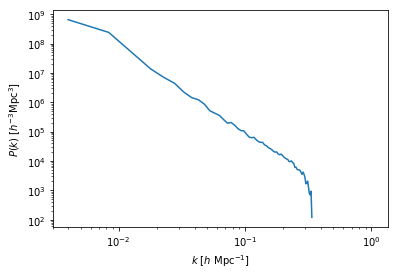

In [52]:


plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
# plt.xlim(0.01, 0.6)


In [2]:

pt_file = pk.load(open('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/measurements/gg_mm__gm_mm_datavec_3dcorr_r_0.8_50.0_nr_20_zbin_1_2_3_4_5_jk_True_njk_180.pk','rb'))


In [3]:
pt_file['sep']


array([[ 0.88941506,  1.09528961,  1.34816736,  1.65971888,  2.04059204,
         2.5091847 ,  3.08703417,  3.79507517,  4.67190383,  5.74697903,
         7.07003277,  8.69532009, 10.69902004, 13.15795463, 16.18434517,
        19.90468631, 24.48511456, 30.11219099, 37.03241978, 45.54194776],
       [ 0.89073943,  1.09535394,  1.34768676,  1.65825072,  2.03916086,
         2.50878254,  3.08621036,  3.79636609,  4.6739738 ,  5.74713772,
         7.06796183,  8.69643651, 10.69739166, 13.15909136, 16.18765398,
        19.9095584 , 24.48567665, 30.11253434, 37.03013708, 45.53905848],
       [ 0.88920789,  1.09451227,  1.34716648,  1.6591121 ,  2.040529  ,
         2.50867438,  3.08752918,  3.79677035,  4.67179636,  5.74742951,
         7.06956281,  8.69742518, 10.6976672 , 13.15976521, 16.18720985,
        19.90920351, 24.48810069, 30.11784348, 37.03904352, 45.54851584],
       [ 0.89056643,  1.09616443,  1.34852459,  1.65790442,  2.03990645,
         2.50774802,  3.08655761,  3.79620697,  

In [2]:

mapsys = hp.read_map('/global/project/projectdirs/des/ggl/systematic_maps/y3a2_r_o.4096_t.32768_maglim_EQU.fits')



NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = EXPLICIT
Ordering converted to RING


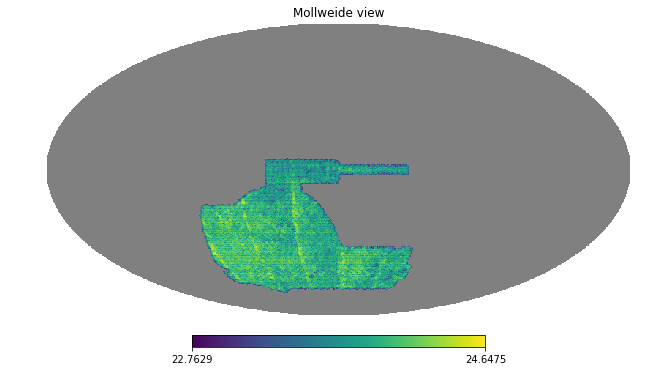

In [3]:
hp.mollview(mapsys)


In [2]:
y3f = fits.open('/global/u1/s/spandey/cosmosis_exp/y3-3x2pt/code/preliminary/datavector_library/sim_fid_v1_wcov.fits')


In [3]:
y3f.info()

Filename: /global/u1/s/spandey/cosmosis_exp/y3-3x2pt/code/preliminary/datavector_library/sim_fid_v1_wcov.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (900, 900)   float64   
  2  xip           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  3  xim           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  4  gammat        1 BinTableHDU     29   400R x 5C   [K, K, K, D, D]   
  5  wtheta        1 BinTableHDU     29   100R x 5C   [K, K, K, D, D]   
  6  nz_source     1 BinTableHDU     24   401R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     26   401R x 8C   [D, D, D, D, D, D, D, D]   
